In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Dataset

In [2]:
dataset = load_breast_cancer()


    dataset['target'] - 1D numpy array of target attribute values
    dataset['data'] - 2D numpy array of attribute values
    dataset['feature_names'] - 1D numpy array of names of the attributes
    dataset['DESCR'] - text description of the dataset

In [3]:
print(dataset.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

# LogisticRegression

compare L1 and L2 reg

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
LogisticRegression?

In [6]:
LR_L1 = LogisticRegression(penalty='l1')
LR_L2 = LogisticRegression(penalty='l2')

In [7]:
LR_L1.fit(dataset.data,dataset.target)
LR_L2.fit(dataset.data,dataset.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
def top_5_factors(classifier):
    df=pd.DataFrame(index=dataset.feature_names,data=classifier.coef_[0],columns=['coeff'])
    df['coeff_abs'] = np.abs(df['coeff'])
    df.sort_values('coeff_abs',ascending=False,inplace=True)
    return df.head()

In [9]:
top_5_factors(LR_L1)

,coeff,coeff_abs
mean radius,4.507271,4.507271
worst concavity,-3.550753,3.550753
texture error,1.407846,1.407846
worst texture,-0.356321,0.356321
mean perimeter,-0.248664,0.248664


In [10]:
top_5_factors(LR_L2)

,coeff,coeff_abs
mean radius,2.111634,2.111634
worst concavity,-1.595430,1.595430
texture error,1.253057,1.253057
worst radius,1.246901,1.246901
worst compactness,-1.145275,1.145275


In [11]:
LR_L1.score(dataset.data,dataset.target) #subset accuracy

0.961335676625659

In [12]:
LR_L2.score(dataset.data,dataset.target) #subset accuracy

0.95957820738137078

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([  1.,   0.,   0.,   1.,  26.,   0.,   1.,   0.,   0.,   1.]),
 array([-3.55075307, -2.74495065, -1.93914824, -1.13334583, -0.32754341,
         0.478259  ,  1.28406142,  2.08986383,  2.89566625,  3.70146866,
         4.50727108]),
 <a list of 10 Patch objects>)

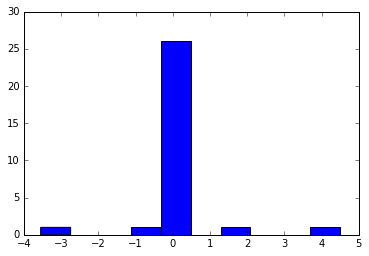

In [17]:
plt.hist(LR_L1.coef_[0])

(array([  1.,   1.,   3.,   8.,  14.,   0.,   0.,   2.,   0.,   1.]),
 array([-1.59542969, -1.22472335, -0.85401702, -0.48331068, -0.11260434,
         0.25810199,  0.62880833,  0.99951467,  1.370221  ,  1.74092734,
         2.11163368]),
 <a list of 10 Patch objects>)

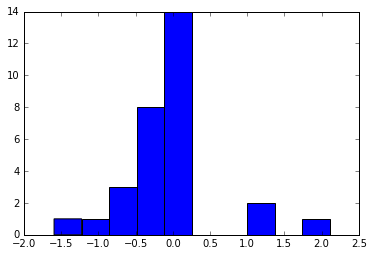

In [18]:
plt.hist(LR_L2.coef_[0])